<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/modelos2_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [128]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


In [129]:
df_train.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,0.252775,1,0.836302,-0.748731,0.194624,0.547785,0,0,0,0,...,0.554321,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.141000,0,0.540921,0.316824,1.469750,1.638509,0,1,0,1,...,-0.832083,0.030867,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.434103,1,-1.185449,0.695195,-0.746200,-0.095810,0,0,0,1,...,1.303890,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.928552,1,-0.517855,-0.239514,0.121944,0.168128,0,0,1,0,...,-1.087660,-0.134685,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.366015,1,0.349781,0.447201,-0.747205,-0.982146,0,1,0,1,...,-0.213657,0.427966,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [130]:
df_test.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,-0.422269,1,-0.357335,-0.493765,0.271557,-0.209254,0,0,0,1,...,0.250529,0.836456,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.266074,0,-0.136862,0.754733,0.058258,-0.128435,0,0,0,0,...,-0.325419,-0.272991,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.491089,0,-2.062943,-0.576858,-1.405854,-0.304637,0,1,1,0,...,0.040209,-0.203157,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.096581,0,-1.828242,0.927919,-1.340363,-1.211241,0,1,0,1,...,-0.250708,0.030867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.140268,0,0.276115,-0.661818,0.807326,-0.689028,0,0,0,1,...,0.387222,0.369723,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   fam_cardio                             4454 non-null   int64  
 7   fam_asma                               4454 non-null   int64  
 8   fam_diabetes                           4454 non-null   int64  
 9   hipertension                           4454 non-null   int64  
 10  bmi                                    4454 non-null   float64
 11  fumo

In [132]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
#     'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
#     'act_vigorosa', 'realiza_actividad_intensidad_moderada',
#     'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
    'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
]

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'colesterol_alto', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

In [133]:
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

columnas_eliminadas = ['raza_origen_7','act_caminar_bici','act_moderada','raza_origen_1','raza_origen_2',
                            'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto',
                            'ancho_distribucion_globulos','fam_asma','fam_diabetes',
                       'glicohemoglobina','fumo_100_cigarrillos','realiza_actividad_intensidad_moderada','consumo_excesivo_alcohol_ultimo_año']

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   fam_cardio                             4454 non-null   int64  
 7   hipertension                           4454 non-null   int64  
 8   bmi                                    4454 non-null   float64
 9   fumador_actual                         4454 non-null   float64
 10  act_vigorosa                           4454 non-null   int64  
 11  hora

In [134]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]


In [135]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(
    modelo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.25,
    nombre="Modelo"
):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} =====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    auc_gap = auc_train - auc_test
    print(f"\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_gap:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()

    return {
        "auc_train": auc_train,
        "recall_train": recall_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "auc_test": auc_test,
        "recall_test": recall_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "auc_gap": auc_gap
    }


In [136]:
# Inicializamos la lista para almacenar los resultados de los modelos
results = []

Antes SMOTE:
alto_riesgo
0    4032
1     422
Name: count, dtype: int64

Después SMOTE:
alto_riesgo
0    4032
1    2016
Name: count, dtype: int64

===== Random Forest + SMOTE =====
---- TRAIN ----
AUC: 0.9264
Recall: 0.9360
Precision: 0.6311
F1: 0.7539

---- TEST ----
AUC: 0.8273
Recall: 0.7905
Precision: 0.2225
F1: 0.3473

---- GAP (Train-Test) ----
AUC gap: 0.0991


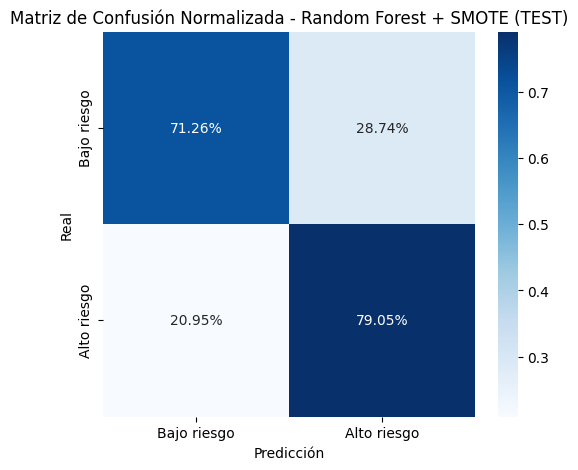


Métricas de Random Forest + SMOTE capturadas: {'auc_train': np.float64(0.9264009821231732), 'recall_train': 0.9360119047619048, 'precision_train': 0.6311036789297659, 'f1_train': 0.7538953256092689, 'auc_test': np.float64(0.8273019019302468), 'recall_test': 0.7904761904761904, 'precision_test': 0.2225201072386059, 'f1_test': 0.3472803347280335, 'auc_gap': np.float64(0.09909908019292646)}


In [137]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Oversampling
smote = SMOTE(
   sampling_strategy=0.5,
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:")
print(y_train.value_counts())

print("\nDespués SMOTE:")
print(y_train_sm.value_counts())


# Modelo
modelo_smote = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_smote.fit(X_train_sm, y_train_sm)

# Capturamos las métricas devueltas por la función modificada
rf_smote_metrics = evaluar_overfitting(
    modelo_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Random Forest + SMOTE"
)

# Opcional: imprimir las métricas capturadas para esta celda
print("\nMétricas de Random Forest + SMOTE capturadas:", rf_smote_metrics)
results.append({"Modelo": "Random Forest + SMOTE", **rf_smote_metrics})


===== XGBoost =====
---- TRAIN ----
AUC: 0.9243
Recall: 0.9692
Precision: 0.5638
F1: 0.7129

---- TEST ----
AUC: 0.8236
Recall: 0.8857
Precision: 0.1942
F1: 0.3185

---- GAP (Train-Test) ----
AUC gap: 0.1007


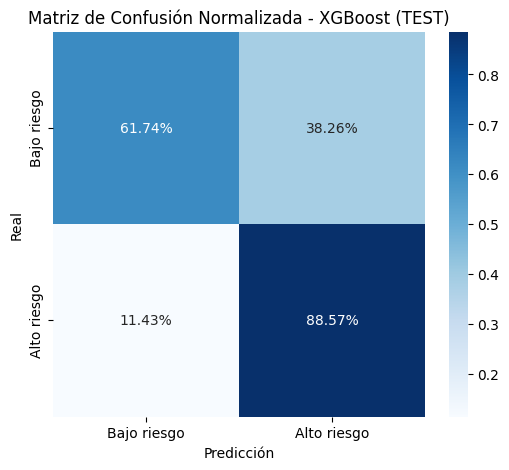

In [138]:
from xgboost import XGBClassifier

# ratio clases para penalización
ratio = (y_train == 0).sum() / (y_train == 1).sum() #9.55

modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    scale_pos_weight=2,
    eval_metric="auc",
    random_state=42
)

modelo_xgb.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
xgb_metrics = evaluar_overfitting(
    modelo_xgb,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="XGBoost"
)

results.append({"Modelo": "XGBoost", **xgb_metrics})


===== CatBoost =====
---- TRAIN ----
AUC: 0.9734
Recall: 0.9965
Precision: 0.5933
F1: 0.7438

---- TEST ----
AUC: 0.8230
Recall: 0.8857
Precision: 0.2026
F1: 0.3298

---- GAP (Train-Test) ----
AUC gap: 0.1504


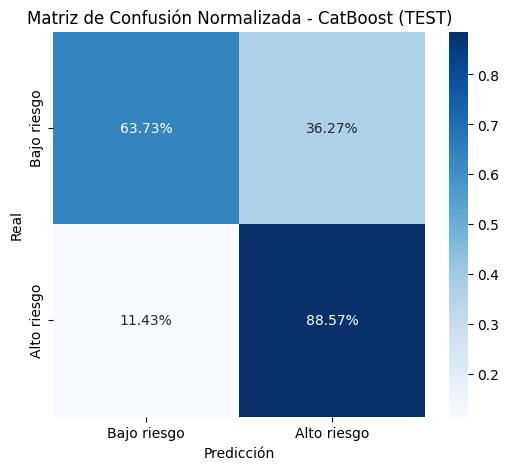

In [139]:
!pip install catboost
from catboost import CatBoostClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

modelo_cat = CatBoostClassifier(
    iterations=500,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    scale_pos_weight=ratio,
    verbose=0,
    random_state=42
)

modelo_cat.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
cat_metrics = evaluar_overfitting(
    modelo_cat,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="CatBoost"
)

results.append({"Modelo": "CatBoost", **cat_metrics})


===== Balanced RF =====
---- TRAIN ----
AUC: 0.9985
Recall: 1.0000
Precision: 0.3279
F1: 0.4939

---- TEST ----
AUC: 0.8374
Recall: 0.7905
Precision: 0.2448
F1: 0.3739

---- GAP (Train-Test) ----
AUC gap: 0.1611


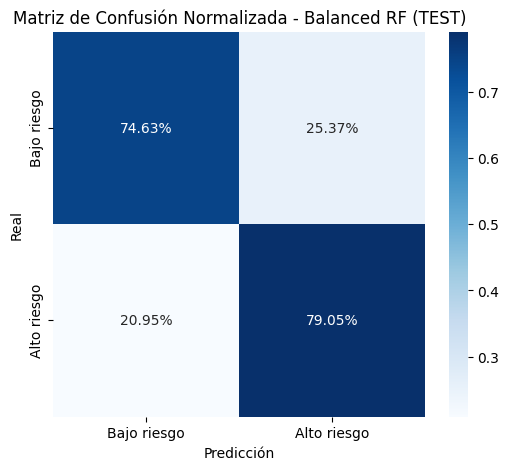

In [140]:
from imblearn.ensemble import BalancedRandomForestClassifier

modelo_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

modelo_brf.fit(X_train, y_train)

# Se capturan las métricas
brf_metrics = evaluar_overfitting(
    modelo_brf,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Balanced RF"
)

results.append({"Modelo": "Balanced Random Forest", **brf_metrics})



===== Logistic Regression =====
---- TRAIN ----
AUC: 0.8837
Recall: 0.8863
Precision: 0.2513
F1: 0.3916

---- TEST ----
AUC: 0.8624
Recall: 0.8667
Precision: 0.2420
F1: 0.3784

---- GAP (Train-Test) ----
AUC gap: 0.0214


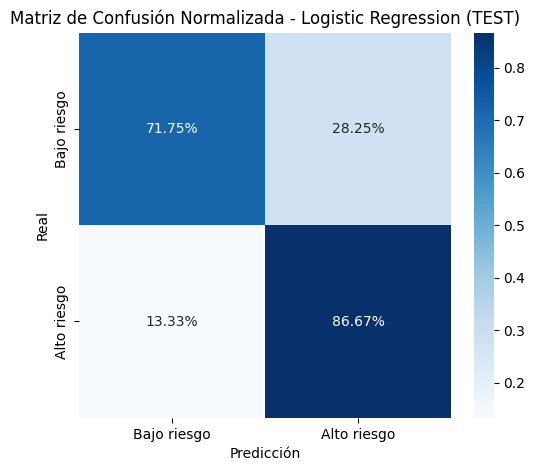

In [141]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000
)

modelo_lr.fit(X_train, y_train)

# Se capturan las métricas
lr_metrics = evaluar_overfitting(
    modelo_lr,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression"
)

results.append({"Modelo": "Logistic Regression", **lr_metrics})


===== Decision Tree Classifier =====
---- TRAIN ----
AUC: 0.8855
Recall: 0.9668
Precision: 0.2143
F1: 0.3508

---- TEST ----
AUC: 0.7718
Recall: 0.8667
Precision: 0.1850
F1: 0.3049

---- GAP (Train-Test) ----
AUC gap: 0.1136


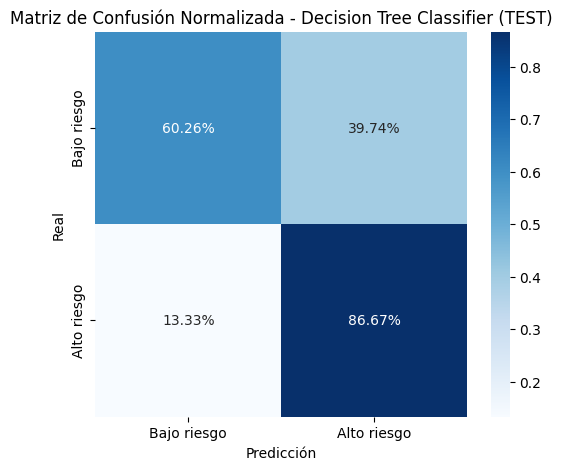

In [142]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

modelo_dt.fit(X_train, y_train)

# Se capturan las métricas
dt_metrics = evaluar_overfitting(
    modelo_dt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Decision Tree Classifier"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "Decision Tree Classifier", **dt_metrics})


===== SVM Linear Kernel =====
---- TRAIN ----
AUC: 0.8830
Recall: 0.3673
Precision: 0.4416
F1: 0.4010

---- TEST ----
AUC: 0.8625
Recall: 0.3524
Precision: 0.4684
F1: 0.4022

---- GAP (Train-Test) ----
AUC gap: 0.0205


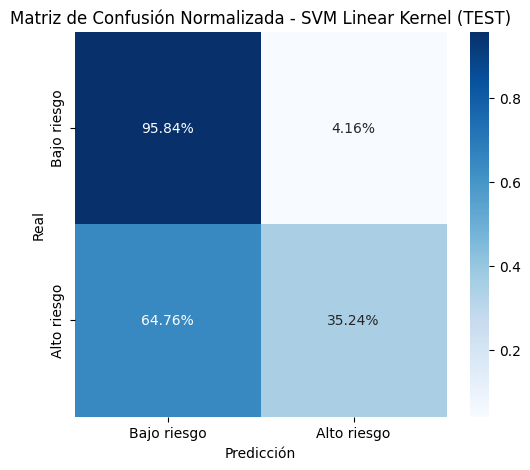

In [143]:
from sklearn.svm import SVC

modelo_svm = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

modelo_svm.fit(X_train, y_train)

# Se capturan las métricas
svm_metrics = evaluar_overfitting(
    modelo_svm,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="SVM Linear Kernel"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "SVM Linear Kernel", **svm_metrics})


In [144]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   fam_cardio                             1114 non-null   int64  
 7   hipertension                           1114 non-null   int64  
 8   bmi                                    1114 non-null   float64
 9   fumador_actual                         1114 non-null   float64
 10  act_vigorosa                           1114 non-null   int64  
 11  hora

In [145]:
import pandas as pd

df_results = pd.DataFrame(results)

df_results

,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap
0,Random Forest + SMOTE,0.926401,0.936012,0.631104,0.753895,0.827302,0.790476,0.222520,0.347280,0.099099
1,XGBoost,0.924256,0.969246,0.563762,0.712879,0.823602,0.885714,0.194154,0.318493,0.100654
2,CatBoost,0.973422,0.996528,0.593325,0.743799,0.822974,0.885714,0.202614,0.329787,0.150447
3,Balanced Random Forest,0.998500,1.000000,0.327894,0.493856,0.837378,0.790476,0.244838,0.373874,0.161122
4,Logistic Regression,0.883731,0.886256,0.251344,0.391623,0.862363,0.866667,0.242021,0.378378,0.021368
5,Decision Tree Classifier,0.885465,0.966825,0.214286,0.350817,0.771825,0.866667,0.184959,0.304858,0.113640
6,SVM Linear Kernel,0.883044,0.367299,0.441595,0.401035,0.862495,0.352381,0.468354,0.402174,0.020549


In [146]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    modelo_lr,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print(scores.mean(), scores.std())


0.8739516393665923 0.013405146835097893
